In [1]:
#Algorithmes pour séparer les couteurs en catégories et identifier les pics de performance

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.tsa.filters.hp_filter as stat

import seaborn as sns
from datetime import datetime
import time
import scipy

In [2]:
data=pd.read_csv("10_km_Riorges.csv")

In [3]:
data.head()

,Athlète,Ligue,Performance,Naissance,Catégorie,time_delta,time_gap,duration,Nom,Prénom
0,LORTON Guillaume,ARA,N4,1989,SEM,0 days 00:30:58,0 days 00:00:00,1858.0,LORTON,Guillaume
1,BETRON Adrien,ARA,IR1,1989,SEM,0 days 00:31:30,0 days 00:00:32,1890.0,BETRON,Adrien
2,MOULIN Loic,ARA,IR2,1992,SEM,0 days 00:32:01,0 days 00:01:03,1921.0,MOULIN,Loic
3,DEBROUCKER Guillaume,ARA,IR2,1982,M1M,0 days 00:32:15,0 days 00:01:17,1935.0,DEBROUCKER,Guillaume
4,KEMEI Charles,ARA,IR2,1984,M0M,0 days 00:32:40,0 days 00:01:42,1960.0,KEMEI,Charles


In [4]:
dur=data['duration']


In [121]:
def densite (dur,**kwargs):
    #calcule une densité d'un itérable
    #**kwargs vont etre redonnés à la fonction maptplotlib.pyplot.hist 
    #l'argument density est forcé à : True
    #input :  dur, itérable (liste, série...) de dimension 1
    #output : densite : array nupmy de dimension 2
    
    kwargs['density'] = True
    h=plt.hist(dur, **kwargs)
    xhist = []
    plt.close()
    for i in range (len(h[1])-1):
        x = (h[1][i+1]+h[1][i])/2
        xhist.append(x)
    

    densite =np.zeros((2, len(xhist)))
    densite[0,:] = xhist
    densite[1,:] = h[0]
    
    
    
    return densite
densite = densite(dur, bins=12)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [119]:
def separate(densite):
    #prend en argument un array numpy de valeurs et sépare le signal en "tendance" et "bruit" avec un lambda de 0.1
    #input :  densite : array numpy de dimension 2, taille (k,n),
    #output : densite : array nupmy de dimension 2, taille (k+1,n)
  
    b,t = stat.hpfilter(densite[-1,:],lamb = 0.1)
    result = np.zeros((len(densite)+1,len(densite[0])))
    result[0:len(densite),:]= densite
    result[-2]= b
    result[-1]=t
    return result

brten=separate(densite)
brten

array([[ 1.95745833e+03,  2.15637500e+03,  2.35529167e+03,
         2.55420833e+03,  2.75312500e+03,  2.95204167e+03,
         3.15095833e+03,  3.34987500e+03,  3.54879167e+03,
         3.74770833e+03,  3.94662500e+03,  4.14554167e+03],
       [-2.37651182e-05,  3.50334081e-05, -1.03685806e-05,
         8.87094354e-06,  3.31919486e-06, -2.41857378e-05,
        -3.45309733e-06,  1.56046306e-05,  3.77148571e-05,
        -6.83323890e-05,  3.36791307e-05, -4.11724179e-06],
       [ 1.84636505e-04,  5.68234292e-04,  7.14180897e-04,
         7.35159220e-04,  6.40166352e-04,  5.26908821e-04,
         5.26285104e-04,  5.27336299e-04,  3.84572533e-04,
         1.08550236e-04,  8.69744093e-05,  2.42261651e-05]])

In [127]:
densite[0].shape


(12,)

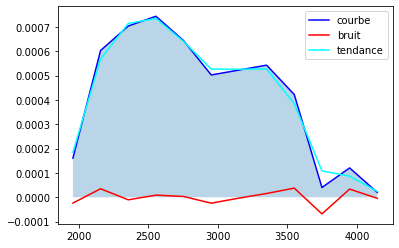

In [254]:
plt.plot(brten[0],densite[1], color = "blue", label = 'courbe')
plt.plot(brten[0],brten[1], color = "red", label = 'bruit')
plt.plot(brten[0],brten[2], color = "cyan", label = 'tendance')
plt.fill_between(brten[0],densite[1], alpha=0.3)

plt.legend()
plt.show()


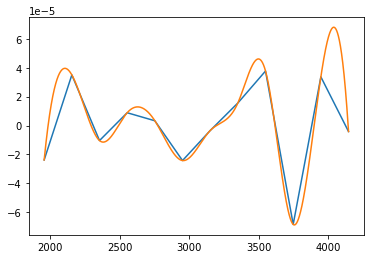

In [258]:
poly = scipy.interpolate.splrep(densite[0],brten[1]) #fabrication du polynôme interpolateur 
x=np.linspace(densite[0,0],densite[0,-1], int(1e6))
y=scipy.interpolate.splev(x,poly, der=0)

#plt.plot(x,y)
plt.plot(densite[0], brten[1])
plt.plot(x,y)

